In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import csv
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

csvpath = os.path.join('owid-covid-data.csv')

In [3]:
covid = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8")
covid.head()

,iso_code,continent,location,month,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,02-2020,24/02/2020,1,1,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,02-2020,25/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02-2020,26/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,02-2020,27/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,02-2020,28/02/2020,1,0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


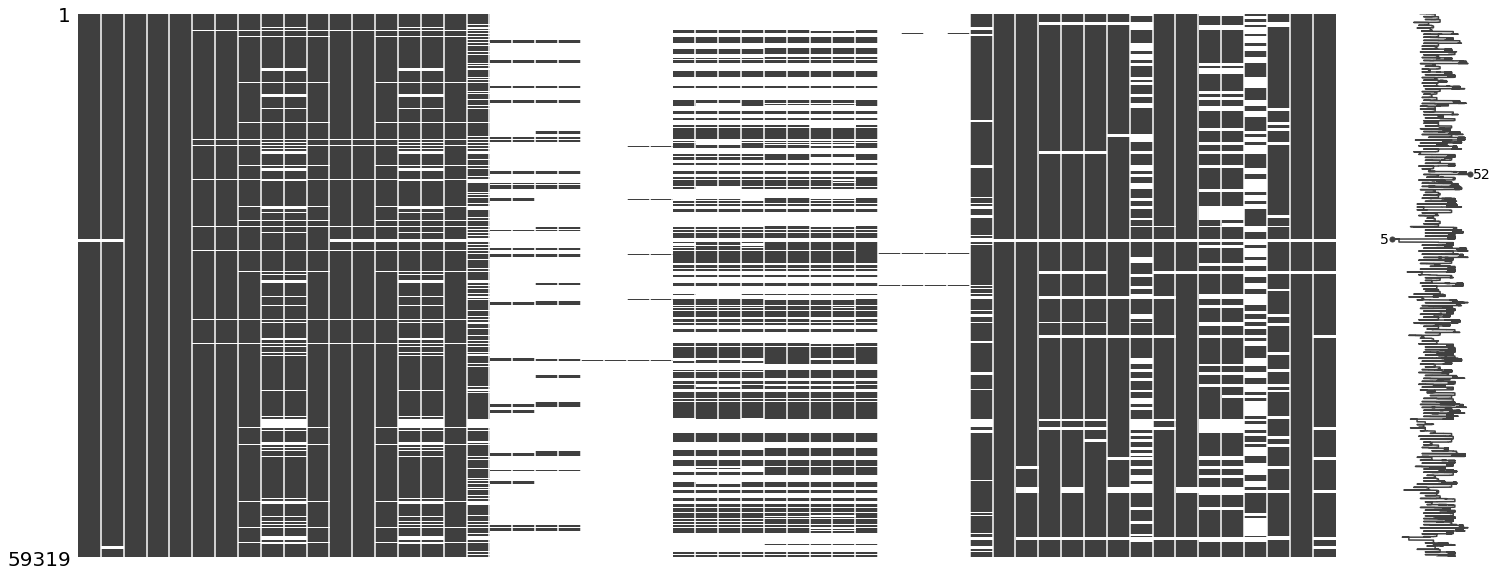

In [4]:
msno.matrix(covid)

In [5]:
covid.describe

<bound method NDFrame.describe of       iso_code continent     location    month        date total_cases  \
0          AFG      Asia  Afghanistan  02-2020  24/02/2020           1   
1          AFG      Asia  Afghanistan  02-2020  25/02/2020           1   
2          AFG      Asia  Afghanistan  02-2020  26/02/2020           1   
3          AFG      Asia  Afghanistan  02-2020  27/02/2020           1   
4          AFG      Asia  Afghanistan  02-2020  28/02/2020           1   
...        ...       ...          ...      ...         ...         ...   
59314      ZWE    Africa     Zimbabwe  01-2021   6/01/2021       17804   
59315      ZWE    Africa     Zimbabwe  01-2021   7/01/2021       18675   
59316      ZWE    Africa     Zimbabwe  01-2021   8/01/2021       19660   
59317      ZWE    Africa     Zimbabwe  01-2021   9/01/2021       20499   
59318      ZWE    Africa     Zimbabwe  01-2021  10/01/2021       21477   

      new_cases new_cases_smoothed total_deaths new_deaths  ...  \
0         

In [6]:
covid.count()

iso_code                              58980
continent                             58624
location                              59319
month                                 59319
date                                  59319
total_cases                           58772
new_cases                             58765
new_cases_smoothed                    57810
total_deaths                          50365
new_deaths                            50364
new_deaths_smoothed                   57810
total_cases_per_million               58433
new_cases_per_million                 58426
new_cases_smoothed_per_million        57476
total_deaths_per_million              50039
new_deaths_per_million                50038
new_deaths_smoothed_per_million       57476
reproduction_rate                     44995
icu_patients                           6129
icu_patients_per_million               6129
hosp_patients                          6867
hosp_patients_per_million              6867
weekly_icu_admissions           

In [7]:
#organized_df = covid[["continent", "location", "date", "total_cases","total_deaths","gdp_per_capita", "hospital_beds_per_thousand", "new_cases", "median_age", "population", "aged_65_older", "aged_70_older","total_tests" ]]
#organized_df = covid[["continent", "location", "date", "new_cases", "new_deaths", "gdp_per_capita", "hospital_beds_per_thousand", "median_age"]]
#organized_df = covid[["continent", "location", "date", "new_deaths", "hospital_beds_per_thousand"]]

In [8]:
organized_df = covid[["continent", "location", "new_deaths", "hospital_beds_per_thousand"]]

In [9]:
organized_df.head()

,continent,location,new_deaths,hospital_beds_per_thousand
0,Asia,Afghanistan,NaN,0.5
1,Asia,Afghanistan,NaN,0.5
2,Asia,Afghanistan,NaN,0.5
3,Asia,Afghanistan,NaN,0.5
4,Asia,Afghanistan,NaN,0.5


In [10]:
organized_df.count()

continent                     58624
location                      59319
new_deaths                    50364
hospital_beds_per_thousand    52429
dtype: int64

In [11]:
organized_df = organized_df.dropna(how='any')

In [12]:
organized_df.count()

continent                     44409
location                      44409
new_deaths                    44409
hospital_beds_per_thousand    44409
dtype: int64

In [13]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand
27,Asia,Afghanistan,1,0.5
28,Asia,Afghanistan,0,0.5
29,Asia,Afghanistan,0,0.5
30,Asia,Afghanistan,1,0.5
31,Asia,Afghanistan,1,0.5
...,...,...,...,...
59314,Africa,Zimbabwe,13,1.7
59315,Africa,Zimbabwe,15,1.7
59316,Africa,Zimbabwe,22,1.7
59317,Africa,Zimbabwe,15,1.7


In [14]:
#check the data type
print(organized_df.dtypes)

continent                     object
location                      object
new_deaths                    object
hospital_beds_per_thousand    object
dtype: object


In [15]:
# Use pd.to_numeric() method to convert the datatype of the new_deaths & hospital_beds_per_thousand column
organized_df['new_deaths'] = pd.to_numeric(organized_df['new_deaths'])
organized_df['hospital_beds_per_thousand'] = pd.to_numeric(organized_df['hospital_beds_per_thousand'])

In [16]:
#check the data type again
print(organized_df.dtypes)

continent                      object
location                       object
new_deaths                      int64
hospital_beds_per_thousand    float64
dtype: object


# Total deaths VS Hospital beds per thousand

In [17]:
# The sum method adds every entry in the series
total1 = organized_df["new_deaths"].sum()
total1

1927389

In [18]:
# The mean method averages the series
average1 = organized_df["new_deaths"].mean()
average1

43.400864689589945

In [19]:
# The sum method adds every entry in the series
total2 = organized_df["hospital_beds_per_thousand"].sum()
total2

136376.92500000002

In [20]:
# The mean method averages the series
average2 = organized_df["hospital_beds_per_thousand"].mean()
average2

3.070929879078786

In [21]:
# The unique method shows every element of the series that appears only once
unique1 = organized_df["location"].unique()
unique1

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakh

In [22]:
# The unique method shows every element of the series that appears only once
unique2 = organized_df["continent"].unique()
unique2

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [23]:
# The value_counts method counts unique values in a column
count1 = organized_df["continent"].value_counts()
count1

Europe           12935
Asia             11176
Africa           10628
North America     5352
South America     3550
Oceania            768
Name: continent, dtype: int64

In [24]:
# The value_counts method counts unique values in a column
count2 = organized_df["location"].value_counts()
count2

China          354
Philippines    344
Japan          333
France         331
Iran           327
              ... 
Vietnam        164
Fiji           164
Saint Lucia     62
Eritrea         20
Mongolia        13
Name: location, Length: 155, dtype: int64

In [25]:
organized_df.describe()

,new_deaths,hospital_beds_per_thousand
count,44409.000000,44409.000000
mean,43.400865,3.070930
std,173.866322,2.525701
min,-1918.000000,0.100000
25%,0.000000,1.300000
50%,1.000000,2.400000
75%,13.000000,4.210000
max,4194.000000,13.800000


In [26]:
# Create a new DataFrame that looks into a specific region (eg: Italy)
Italy_df = organized_df.loc[organized_df["location"] == "Italy"]
Italy_df

,continent,location,new_deaths,hospital_beds_per_thousand
26268,Europe,Italy,1,3.18
26269,Europe,Italy,1,3.18
26270,Europe,Italy,1,3.18
26271,Europe,Italy,4,3.18
26272,Europe,Italy,3,3.18
...,...,...,...,...
26588,Europe,Italy,548,3.18
26589,Europe,Italy,414,3.18
26590,Europe,Italy,620,3.18
26591,Europe,Italy,483,3.18


In [27]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand
27,Asia,Afghanistan,1,0.5
28,Asia,Afghanistan,0,0.5
29,Asia,Afghanistan,0,0.5
30,Asia,Afghanistan,1,0.5
31,Asia,Afghanistan,1,0.5
...,...,...,...,...
59314,Africa,Zimbabwe,13,1.7
59315,Africa,Zimbabwe,15,1.7
59316,Africa,Zimbabwe,22,1.7
59317,Africa,Zimbabwe,15,1.7


In [28]:
# It is also possible to group a DataFrame by multiple columns
# This returns an object with multiple indexes, however, which can be harder to deal with
grouped_international_data = organized_df.groupby(['continent', 'location'])

grouped_international_data.count().head(20)

new_deaths  hospital_beds_per_thousand
continent location                                                        
Africa    Algeria                          305                         305
          Benin                            280                         280
          Botswana                         286                         286
          Burkina Faso                     299                         299
          Burundi                          273                         273
          Cameroon                         292                         292
          Cape Verde                       293                         293
          Central African Republic         233                         233
          Comoros                          250                         250
          Djibouti                         276                         276
          Egypt                            309                         309
          Equatorial Guinea                264                         264
          Eritrea                           20                          20
          Eswatini                         270                         270
          Ethiopia                         281                         281
          Gabon                            297                         297
          Gambia                           294                         294
          Ghana                            296                         296
          Guinea                           271                         271
          Kenya                            291                         291

In [29]:
grouped_international_data = organized_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','hospital_beds_per_thousand':'mean'})
grouped_international_data

new_deaths  hospital_beds_per_thousand
continent     location                                            
Africa        Algeria             2807                         1.9
              Benin                 44                         0.5
              Botswana              48                         1.8
              Burkina Faso          89                         0.4
              Burundi                2                         0.8
...                                ...                         ...
South America Paraguay            2405                         1.3
              Peru               38049                         1.6
              Suriname             133                         3.1
              Uruguay              256                         2.8
              Venezuela           1061                         0.8

[155 rows x 2 columns]

In [30]:
# Rename columns for readability
covid_renamed_df = grouped_international_data.rename(columns={"new_deaths": "Total deaths", "hospital_beds_per_thousand": "Hospital beds per thousand"})
covid_renamed_df

Total deaths  Hospital beds per thousand
continent     location                                              
Africa        Algeria               2807                         1.9
              Benin                   44                         0.5
              Botswana                48                         1.8
              Burkina Faso            89                         0.4
              Burundi                  2                         0.8
...                                  ...                         ...
South America Paraguay              2405                         1.3
              Peru                 38049                         1.6
              Suriname               133                         3.1
              Uruguay                256                         2.8
              Venezuela             1061                         0.8

[155 rows x 2 columns]

In [31]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_high = covid_renamed_df.sort_values("Hospital beds per thousand", ascending=False)
hospital_beds_per_thousand_high.head()

Total deaths  Hospital beds per thousand
continent location                                             
Europe    Monaco                  4                       13.80
Asia      Japan                3850                       13.05
          South Korea          1140                       12.27
Europe    Belarus              1517                       11.00
          Ukraine             20641                        8.80

In [32]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_low = covid_renamed_df.sort_values("Hospital beds per thousand")
hospital_beds_per_thousand_low.head()

Total deaths  Hospital beds per thousand
continent location                                            
Africa    Mali                 298                         0.1
          Madagascar           267                         0.2
          Niger                126                         0.3
          Ethiopia            1994                         0.3
          Guinea                81                         0.3

In [33]:
# Sorting the DataFrame based on "Total deaths" column
total_deaths_high = covid_renamed_df.sort_values("Total deaths", ascending=False)
total_deaths_high.head()

,,Total deaths,Hospital beds per thousand
continent,location,,
North America,United States,374322,2.77
South America,Brazil,203100,2.20
Asia,India,151160,0.53
North America,Mexico,133706,1.38
Europe,United Kingdom,81567,2.54


In [34]:
# Sorting the DataFrame based on "hospital_beds_per_thousand" column
total_deaths_low = covid_renamed_df.sort_values("Total deaths")
total_deaths_low.head()

Total deaths  Hospital beds per thousand
continent location                                          
Oceania   Fiji                 2                         2.3
Africa    Burundi              2                         0.8
Asia      Mongolia             2                         7.0
          Brunei               3                         2.7
Africa    Eritrea              3                         0.7

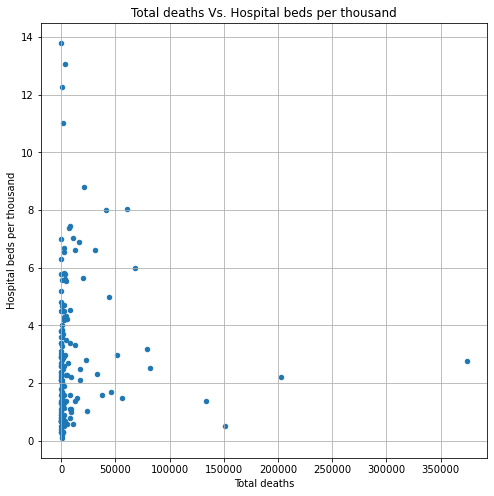

In [35]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

In [36]:
#covid_renamed_df.dropna(subset=['United States', 'Brazil', 'India','Mexico'])

In [37]:
# Compute the Pearson correlation coefficient between "Total deaths" and "Hospital beds per thousand"
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
correlation = st.pearsonr(Total_deaths,Hospital_beds_per_thousand)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.0021324988


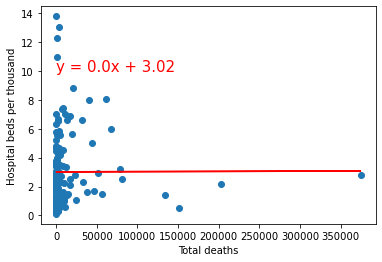

In [38]:
# Add the linear regression equation and line to plot
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

The r-squared is: 4.5475513305018905e-06


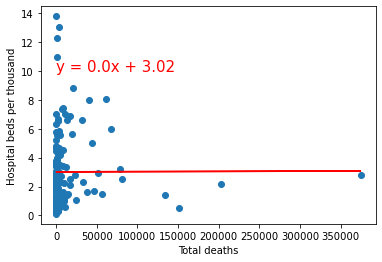

In [39]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
print(f"The r-squared is: {rvalue**2}")
plt.show()

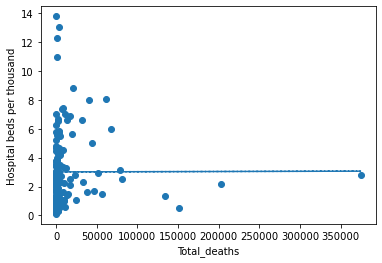

In [40]:
# Perform a linear regression on total deaths versus hospital beds per thousand
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths, Hospital_beds_per_thousand)

# Create equation of line to calculate predicted hospital beds per thousand
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
plt.scatter(Total_deaths,Hospital_beds_per_thousand)
plt.plot(Total_deaths,vc_fit,"--")
##plt.xticks(Total deaths, rotation=90)???
plt.xlabel('Total_deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

In [41]:
#organized_df['continent'].value_counts()

In [42]:
#organized_df['date'] = pd.to_datetime(organized_df["date"])
#organized_df['date']

In [43]:
#organized_df['mnth_yr'] = organized_df['date'].apply(lambda x: x.strftime('%B-%Y')) 
#organized_df['month_year'] = organized_df['date'].dt.strftime('%B-%Y')
#organized_df

In [44]:
#organized_df["year"] = organized_df["date"].dt.year
#organized_df["month"] = organized_df["date"].dt.month
#organized_df

In [45]:
#organized_group = organized_df.groupby(["location", "continent"]).sum()
#organized_group = organized_df.groupby(["location", "continent", "new_deaths", "hospital_beds_per_thousand"]).sum()
#organized_group

# Total Deaths vs Median age


In [46]:
median_df = covid[["continent", "location", "new_deaths", "median_age"]]

In [47]:
median_df.head()

,continent,location,new_deaths,median_age
0,Asia,Afghanistan,NaN,18.6
1,Asia,Afghanistan,NaN,18.6
2,Asia,Afghanistan,NaN,18.6
3,Asia,Afghanistan,NaN,18.6
4,Asia,Afghanistan,NaN,18.6


In [48]:
median_df.count()

continent     58624
location      59319
new_deaths    50364
median_age    56440
dtype: int64

In [49]:
median_df = median_df.dropna(how='any')

In [50]:
median_df.count()

continent     48210
location      48210
new_deaths    48210
median_age    48210
dtype: int64

In [51]:
median_df

,continent,location,new_deaths,median_age
27,Asia,Afghanistan,1,18.6
28,Asia,Afghanistan,0,18.6
29,Asia,Afghanistan,0,18.6
30,Asia,Afghanistan,1,18.6
31,Asia,Afghanistan,1,18.6
...,...,...,...,...
59314,Africa,Zimbabwe,13,19.6
59315,Africa,Zimbabwe,15,19.6
59316,Africa,Zimbabwe,22,19.6
59317,Africa,Zimbabwe,15,19.6


In [52]:
print(median_df.dtypes)

continent     object
location      object
new_deaths    object
median_age    object
dtype: object


In [53]:
median_df['new_deaths'] = pd.to_numeric(median_df['new_deaths'])
median_df['median_age'] = pd.to_numeric(median_df['median_age'])

In [54]:
print(median_df.dtypes)

continent      object
location       object
new_deaths      int64
median_age    float64
dtype: object


In [55]:
grouped_median_data = median_df.groupby(['continent', 'location'])

grouped_median_data.count().head(20)

new_deaths  median_age
continent location                                            
Africa    Algeria                              305         305
          Angola                               288         288
          Benin                                280         280
          Botswana                             286         286
          Burkina Faso                         299         299
          Burundi                              273         273
          Cameroon                             292         292
          Cape Verde                           293         293
          Central African Republic             233         233
          Chad                                 258         258
          Comoros                              250         250
          Congo                                284         284
          Cote d'Ivoire                        288         288
          Democratic Republic of Congo         296         296
          Djibouti                             276         276
          Egypt                                309         309
          Equatorial Guinea                    264         264
          Eritrea                               20          20
          Eswatini                             270         270
          Ethiopia                             281         281

In [56]:
grouped_median_data = median_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','median_age':'mean'})
grouped_median_data

new_deaths  median_age
continent     location                            
Africa        Algeria             2807        29.1
              Angola               416        16.8
              Benin                 44        18.8
              Botswana              48        25.8
              Burkina Faso          89        17.6
...                                ...         ...
South America Paraguay            2405        26.5
              Peru               38049        29.1
              Suriname             133        29.6
              Uruguay              256        35.6
              Venezuela           1061        29.0

[170 rows x 2 columns]

In [57]:
median_renamed_df = grouped_median_data.rename(columns={"new_deaths": "Total Deaths", "median_age": "Median Age"})
median_renamed_df

Total Deaths  Median Age
continent     location                              
Africa        Algeria               2807        29.1
              Angola                 416        16.8
              Benin                   44        18.8
              Botswana                48        25.8
              Burkina Faso            89        17.6
...                                  ...         ...
South America Paraguay              2405        26.5
              Peru                 38049        29.1
              Suriname               133        29.6
              Uruguay                256        35.6
              Venezuela             1061        29.0

[170 rows x 2 columns]

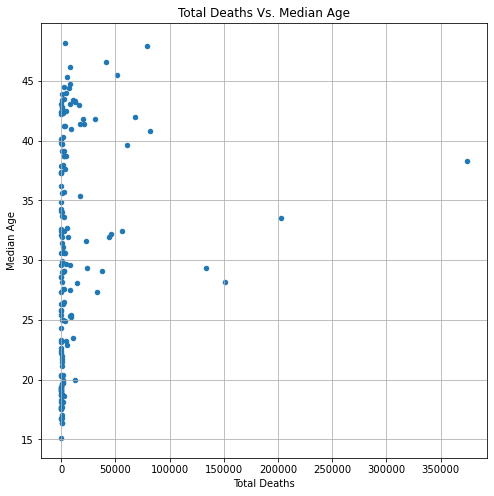

In [58]:
median_renamed_df.plot(kind="scatter", x="Total Deaths", y="Median Age", grid=True, figsize=(8,8),
              title="Total Deaths Vs. Median Age")
plt.show()

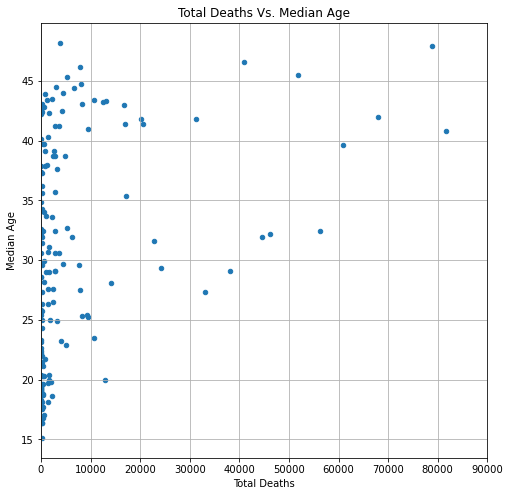

In [59]:
median_renamed_df.plot(kind="scatter", x="Total Deaths", y="Median Age", grid=True, figsize=(8,8),
              title="Total Deaths Vs. Median Age")

plt.xlim(0, 90000)
plt.show()

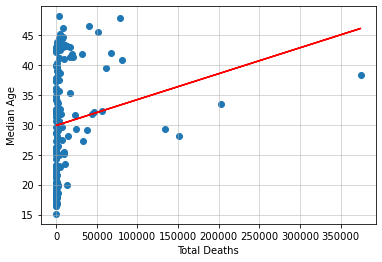

In [60]:
x_values = median_renamed_df['Total Deaths']
y_values = median_renamed_df['Median Age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total Deaths')
plt.ylabel('Median Age')

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.show()

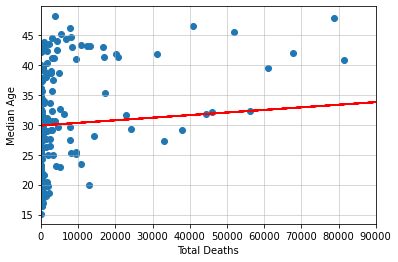

In [61]:
x_values = median_renamed_df['Total Deaths']
y_values = median_renamed_df['Median Age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total Deaths')
plt.ylabel('Median Age')

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.xlim(0, 90000)
plt.show()

The r-squared is: 0.03129086510251411


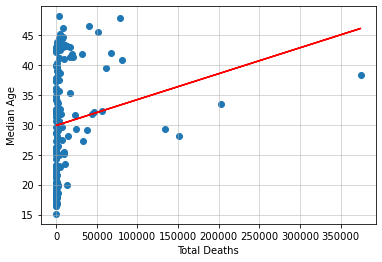

In [62]:
x_values = median_renamed_df['Total Deaths']
y_values = median_renamed_df['Median Age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total Deaths')
plt.ylabel('Median Age')
print(f"The r-squared is: {rvalue**2}")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.show()

The r-squared is: 0.03129086510251411


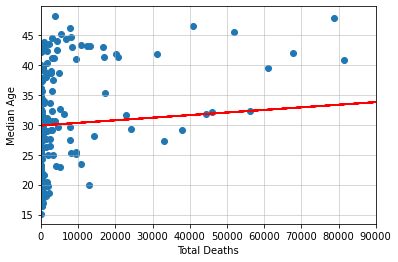

In [63]:
x_values = median_renamed_df['Total Deaths']
y_values = median_renamed_df['Median Age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total Deaths')
plt.ylabel('Median Age')
print(f"The r-squared is: {rvalue**2}")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.xlim(0, 90000)
plt.show()

In [64]:
Total_deaths = median_renamed_df["Total Deaths"]
Median_age = median_renamed_df["Median Age"]
correlation = st.pearsonr(Total_deaths,Median_age)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.1768922415


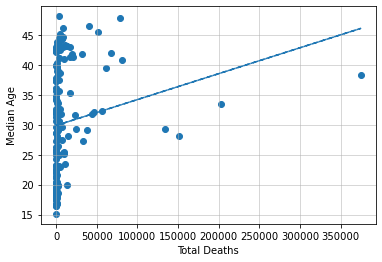

In [65]:
# Perform a linear regression on total deaths versus median age
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths,Median_age)

# Create equation of line to calculate predicted median age
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = median_renamed_df["Total Deaths"]
median_age = median_renamed_df["Median Age"]
plt.scatter(Total_deaths,Median_age)
plt.plot(Total_deaths,vc_fit,"--")
##plt.xticks(Total deaths, rotation=90)???
plt.xlabel('Total Deaths')
plt.ylabel('Median Age')

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.show()

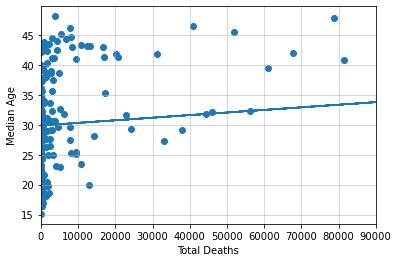

In [66]:
# Perform a linear regression on total deaths versus median age
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths,Median_age)

# Create equation of line to calculate predicted median age
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = median_renamed_df["Total Deaths"]
median_age = median_renamed_df["Median Age"]
plt.scatter(Total_deaths,Median_age)
plt.plot(Total_deaths,vc_fit,"--")
##plt.xticks(Total deaths, rotation=90)???
plt.xlabel('Total Deaths')
plt.ylabel('Median Age')

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.xlim(0, 90000)
plt.show()

In [67]:
median_age_high = median_renamed_df.sort_values("Median Age", ascending=False)
median_age_high.head()

Total Deaths  Median Age
continent location                          
Asia      Japan             3850        48.2
Europe    Italy            78755        47.9
          Germany          40936        46.6
          Portugal          7803        46.2
          Spain            51874        45.5

In [68]:
median_age_low = median_renamed_df.sort_values("Median Age")
median_age_low.head()

Total Deaths  Median Age
continent location                          
Africa    Niger              126        15.1
          Mali               298        16.4
          Uganda             301        16.4
          Chad               107        16.7
          Somalia            130        16.8

In [69]:
median_renamed_df.reset_index()

,continent,location,Total Deaths,Median Age
0,Africa,Algeria,2807,29.1
1,Africa,Angola,416,16.8
2,Africa,Benin,44,18.8
3,Africa,Botswana,48,25.8
4,Africa,Burkina Faso,89,17.6
...,...,...,...,...
165,South America,Paraguay,2405,26.5
166,South America,Peru,38049,29.1
167,South America,Suriname,133,29.6
168,South America,Uruguay,256,35.6


In [101]:
median_renamed_df.sort_values('Median Age',inplace=True) 

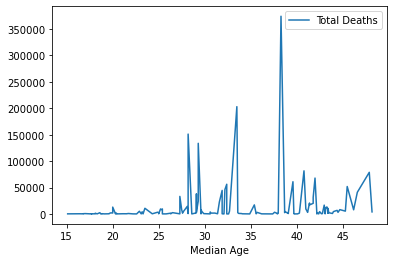

In [116]:
median_renamed_df.plot(x='Median Age')

# Total Deaths and Total GDP

In [ ]:
#

# Total Deaths vs Total Cases

In [ ]:
#

In [ ]:
# Export file as a CSV, without the Pandas index, but with the header
#organized_df.to_csv("fileOne.csv", index=False, header=True)